In [223]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [224]:
####1  A little introductory brain teaser. Which is more probable when 
####   rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? 
####   What is the ratio of the probabilities?







In [225]:
#It is more probable to roll sevens than snake eyes

P_snakes = 1/6 * 1/6

P_sevens = 6/6 * 1/6
#probability of 1 to roll any number, then a 1/6 probability to roll its pair number that sums to 7.


print( 'Ratio of probability to roll a Seven compared to snake eyes is '+str(P_sevens/P_snakes))

Ratio of probability to roll a Seven compared to snake eyes is 6.0


In [226]:
####2  Following what we did in class show how to use the convolution operator to determine
####   the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically 
####   (computer program). Beware the implicit definition of the values (x-axis on histogram).








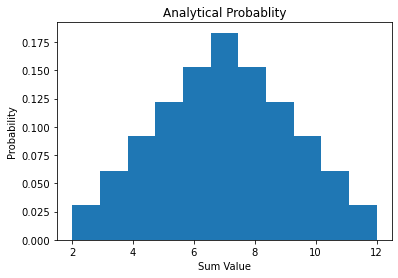

In [227]:
#Solving Analytically
x1 = range(1,7)
x2 = range(1,7)
sum = [[i+j for i in x1] for j in x2]
plt.hist(np.array(sum).flatten(), bins = 11, density = True)
plt.title('Analytical Probablity')
plt.ylabel('Probability')
plt.xlabel('Sum Value')
plt.show()

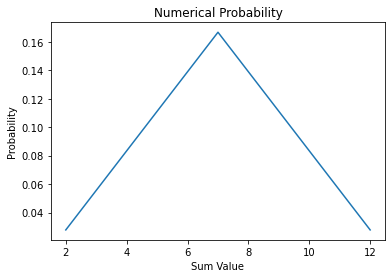

In [228]:
#Solving Numerically
d = [1/6,1/6,1/6,1/6,1/6,1/6]
x = range(2,13)
y = np.convolve(d,d)
plt.plot(x,y)
plt.ylabel('Probability')
plt.xlabel('Sum Value')
plt.title('Numerical Probability')
plt.show()

In [229]:
####3 Calculate the mean and the variance of the distribution in problem 2. 
#Hint: this is surprisingly tricky, make sure your result makes sense.







In [230]:
print('Mean is ' +str(np.mean(sum)))
print('Variance is '+ str(np.var(sum)))

Mean is 7.0
Variance is 5.833333333333333


In [231]:
####4 Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.








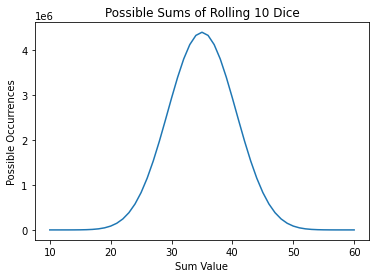

In [232]:
cc = [1,1,1,1,1,1]
inst = [1,1,1,1,1,1]

k = 0
while k < 9:
    c = np.convolve(cc,inst)
    cc = c
    k = k+1
    

x = range(10,61)
plt.xlabel('Sum Value')
plt.ylabel('Possible Occurrences')
plt.title('Possible Sums of Rolling 10 Dice')
plt.plot(x,c)
plt.show()



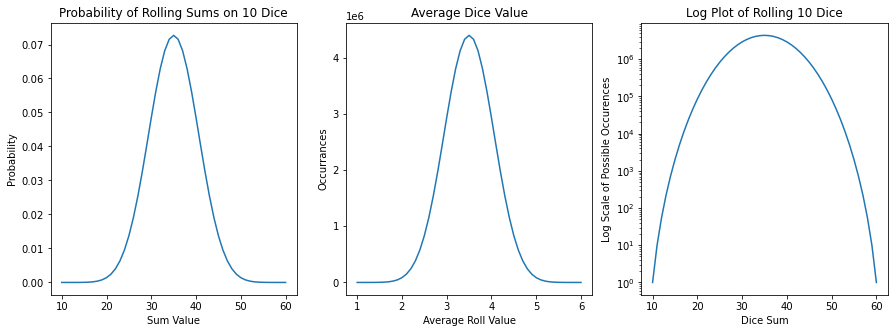

In [244]:
fig, axes = plt.subplots(nrows=1,ncols = 3,figsize = (15,5))

xx = np.linspace(10,60,51)
axes[0].plot(xx,c/(6**10))
axes[0].set_title('Probability of Rolling Sums on 10 Dice')
axes[0].set_xlabel('Sum Value')
axes[0].set_ylabel('Probability')


xxx = np.linspace(1,6,51)
axes[1].plot(xxx,c)
axes[1].set_title('Average Dice Value')
axes[1].set_xlabel('Average Roll Value')
axes[1].set_ylabel('Occurrances')

axes[2].plot(xx,c)
axes[2].set_yscale('log')
axes[2].set_ylabel('Log Scale of Possible Occurences')
axes[2].set_xlabel('Dice Sum')
axes[2].set_title('Log Plot of Rolling 10 Dice')
plt.show()

#As you increase the convolution iterations, this 
#function approaches gaussian distrobution.After 10 iterations, this distrobution is gaussian. 

In [235]:
####5 Show that the sum and average of an initially Gaussian distribution is also a Guassian 
####  (can be analytic or numerical). How does the standard deviation of the 
####  resulting sum or average Guassian change? This is a hugely important result. Explore what 
####  this means for integrating a signal over time.






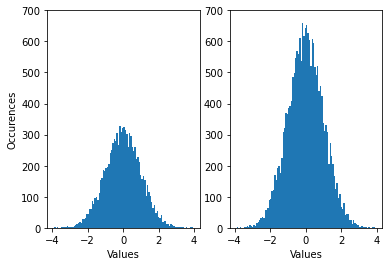

1.0129481962452442
1.0129481962452442


In [247]:
#Adding initially Gaussian distrobutions
a = stats.norm.rvs(size = 10000)
b = np.append(a,a)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (6,4))
axes[0].hist(a,100)
axes[0].set_ylabel('Occurences')
axes[0].set_xlabel('Values')
axes[0].set_ylim(0,700)

axes[1].hist(b,100)
axes[1].set_xlabel('Values')
axes[1].set_ylim(0,700)

plt.show()
#Sum of multiple gaussian plots still produces gaussian distributions with increased magnitudes.


print(np.var(a))
print(np.var(b))
#variance is equal between added gaussians

In [237]:
#Averaging gaussian distrobutions

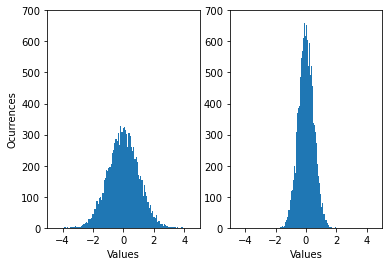

Variance of the unaltered plot is 1.0129481962452442
Variance of the averaged plot is 0.25323704906131106


In [248]:
fig, axes = plt.subplots(nrows=1,ncols = 2, figsize = (6,4))
axes[0].hist(a,100)
axes[0].set_xlim(-5,5)
axes[0].set_ylabel('Ocurrences')
axes[0].set_xlabel('Values')
axes[0].set_ylim(0,700)

axes[1].hist(b/2,100)
axes[1].set_xlim(-5,5)
axes[1].set_xlabel('Values')
axes[1].set_ylim(0,700)
plt.show()

#The average plot has a narrower distrobution with 

print('Variance of the unaltered plot is '+str(np.var(a)))
print('Variance of the averaged plot is '+str(np.var(b/2)))
#The variance for the averaged plot is far smaller considering a single iteration of averaging.
#This increases the significance of measured values.